In [3]:
from scipy.ndimage import gaussian_filter, median_filter, gaussian_filter1d
from scipy.signal import medfilt2d
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import scipy.io
from matplotlib.colors import NoNorm

(640, 480, 81)


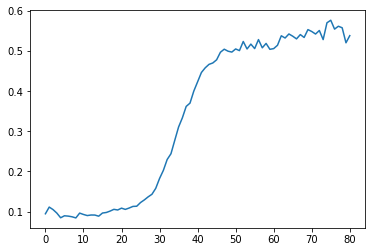

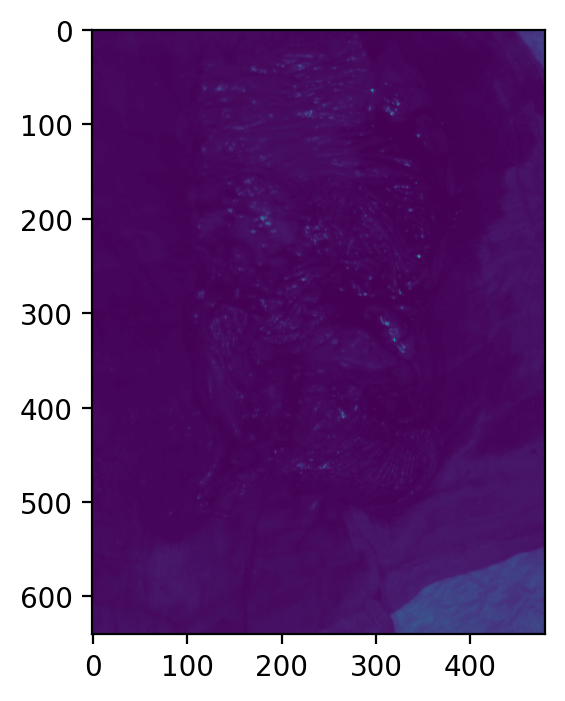

In [4]:
#load data and just watch what is inside 
paths = glob('/work/users/mi186veva/data_bea_db/ColonCalibrated/*.mat')

data = scipy.io.loadmat(paths[0])
spectrum, mask = data['cube'], data['gt']

print(spectrum.shape)
plt.plot(spectrum[0, 0])
plt.show()

from matplotlib.pyplot import figure
figure(dpi=200)
plt.imshow(spectrum[..., 5])



spectrum_1d.shape (307200, 81)
Gaussian filter. Sigma: 0.1


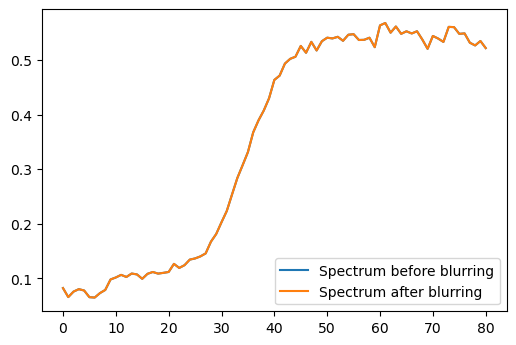

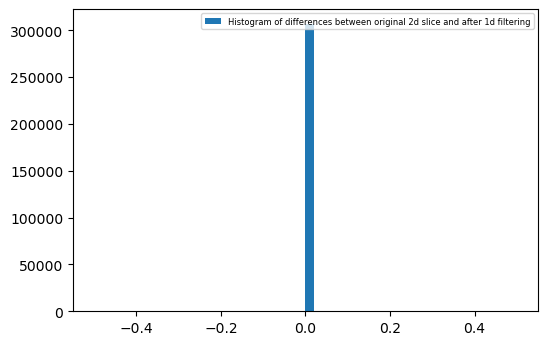

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


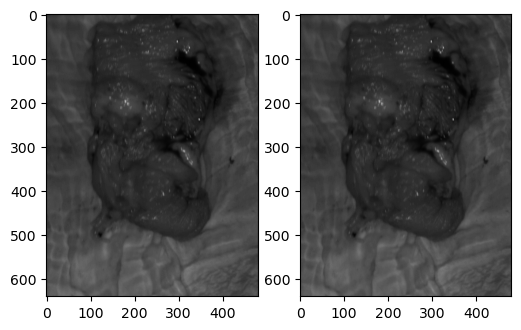

Gaussian filter. Sigma: 0.5


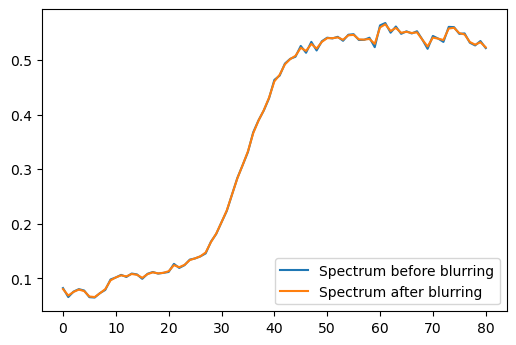

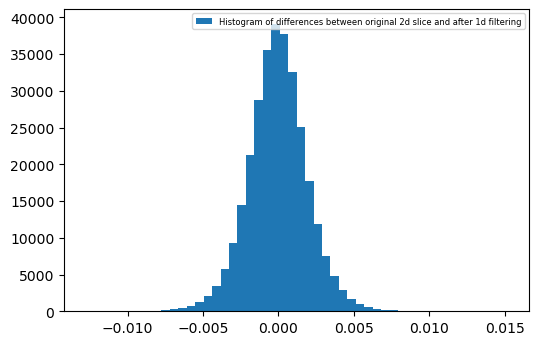

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


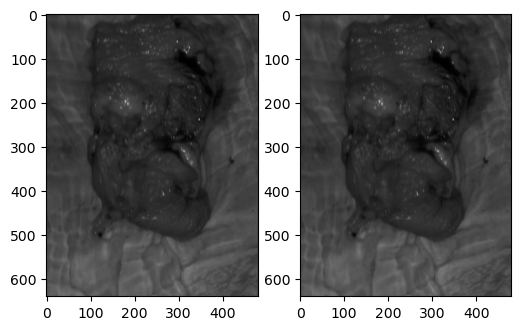

Gaussian filter. Sigma: 1


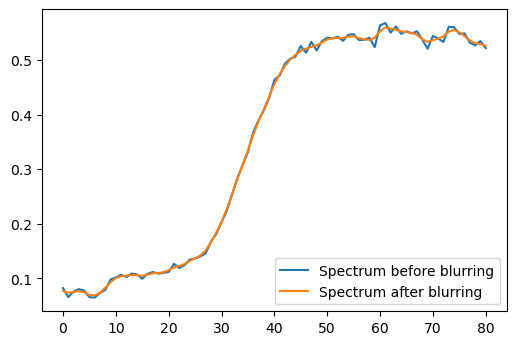

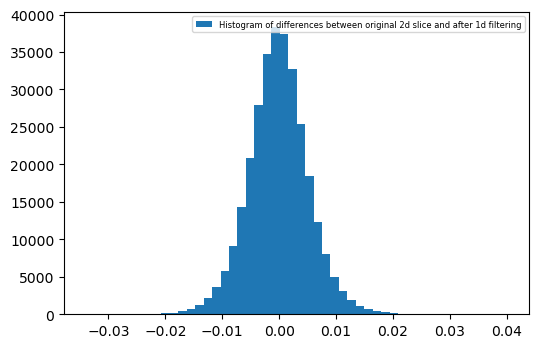

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


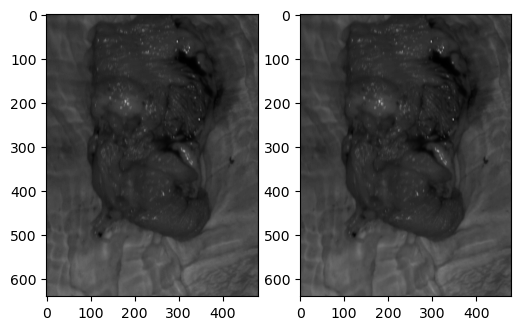

Gaussian filter. Sigma: 1.5


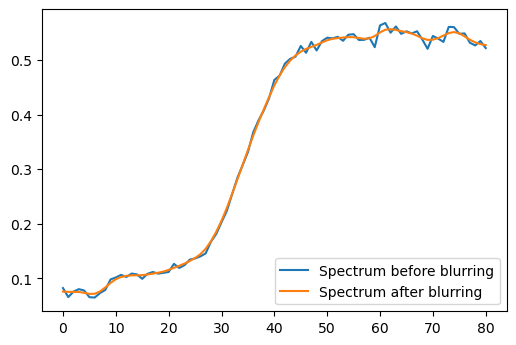

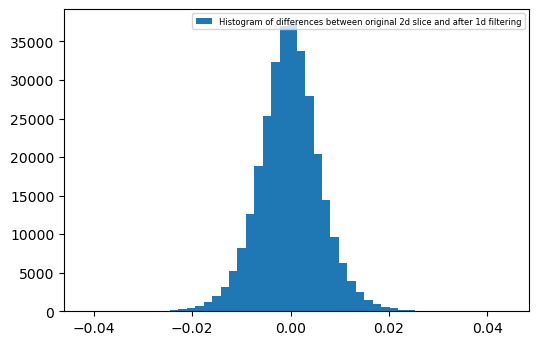

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


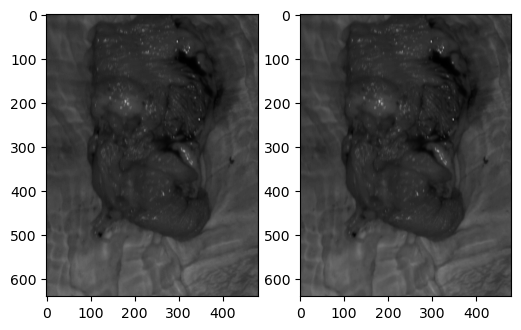

Gaussian filter. Sigma: 2


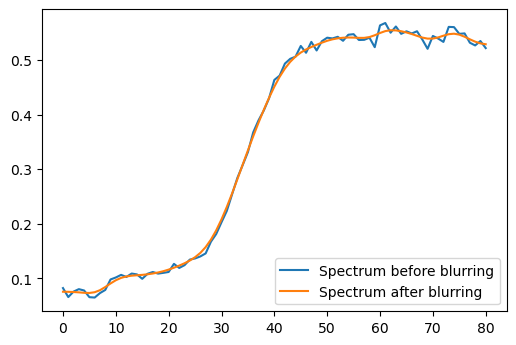

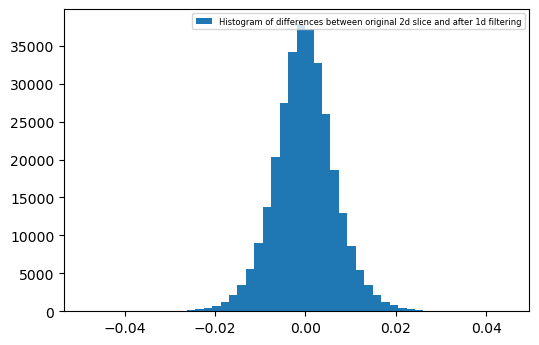

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


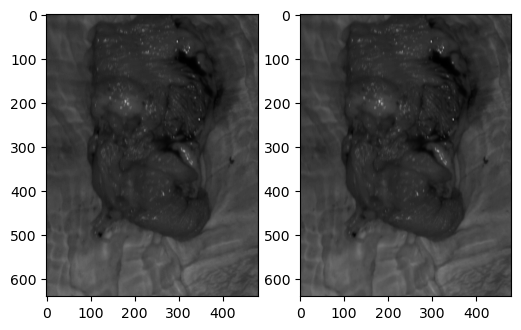

Gaussian filter. Sigma: 2.5


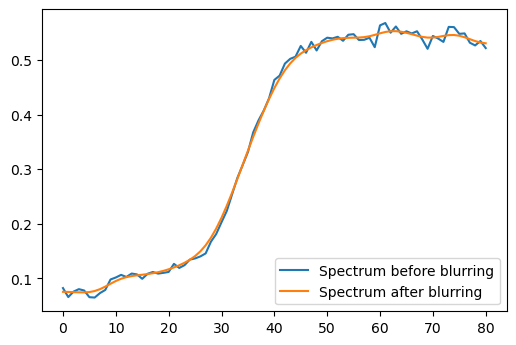

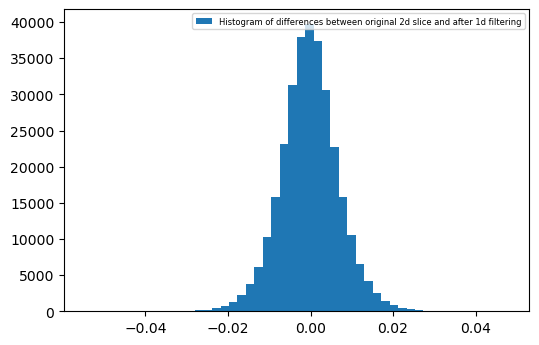

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


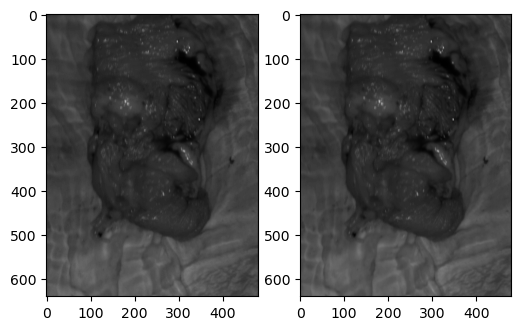

Gaussian filter. Sigma: 10


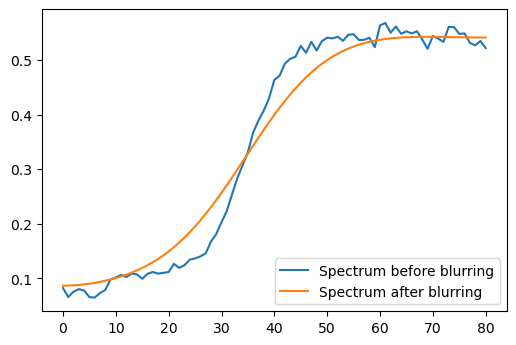

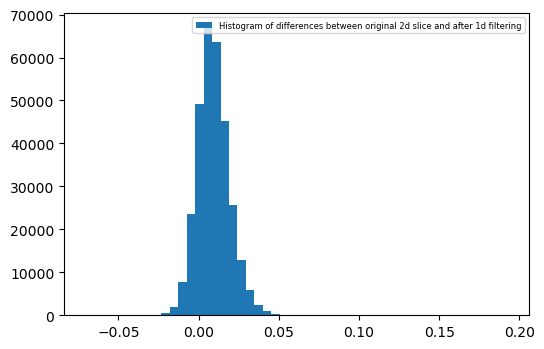

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


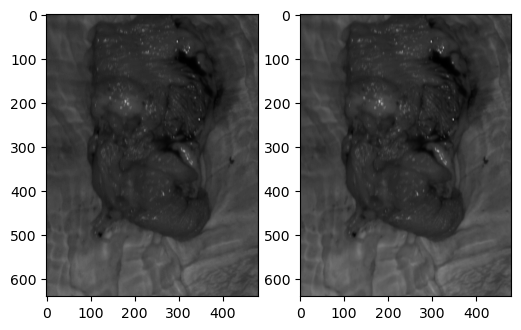

--------------------------------------------------------------------------------------------------------------------------------
Median filter. Window: 2


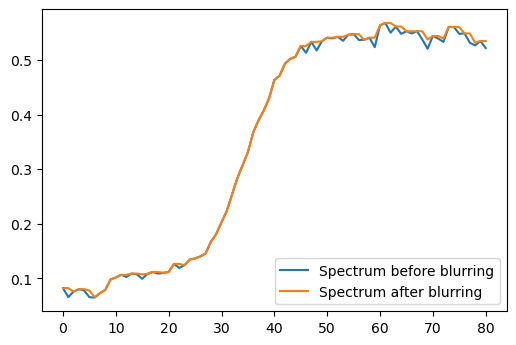

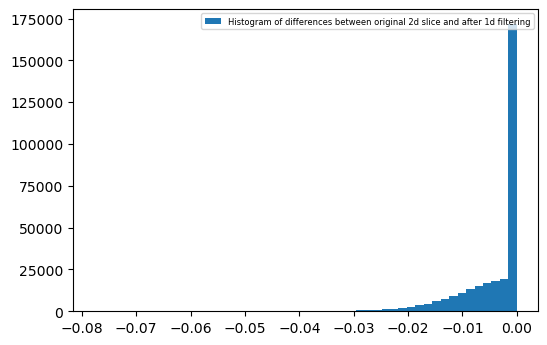

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


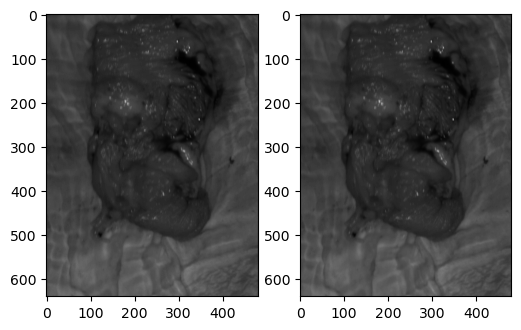

Median filter. Window: 3


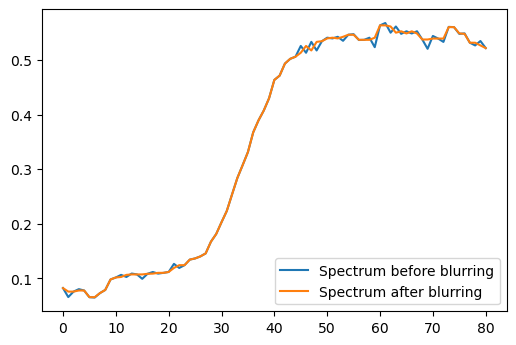

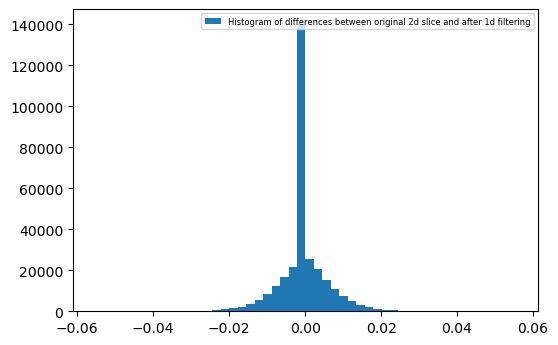

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


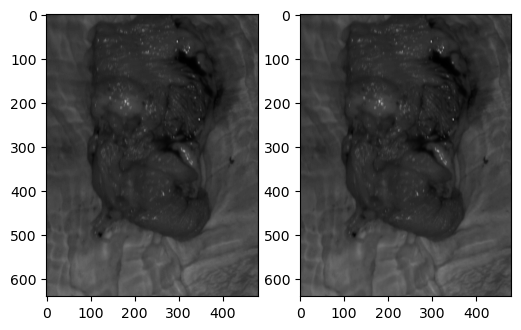

Median filter. Window: 5


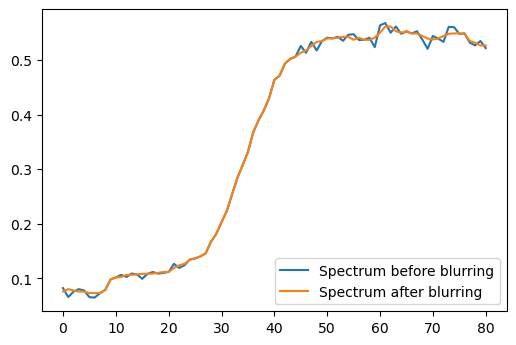

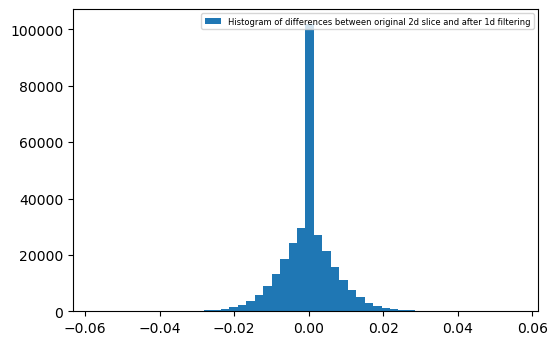

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


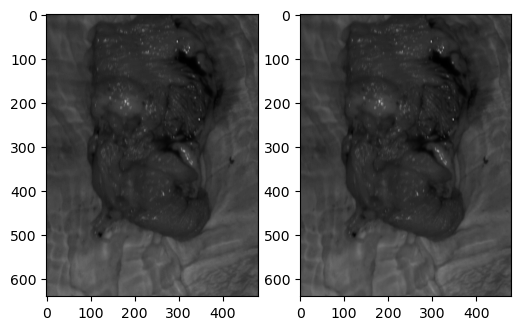

Median filter. Window: 6


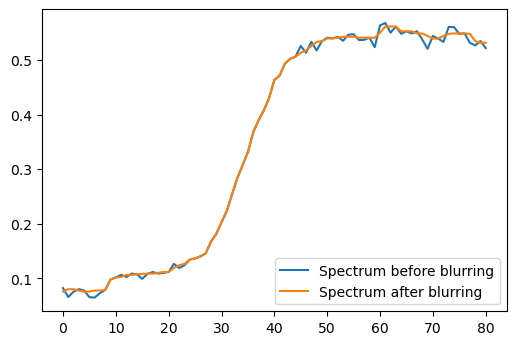

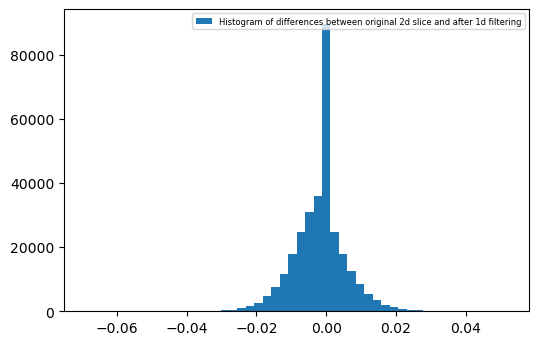

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


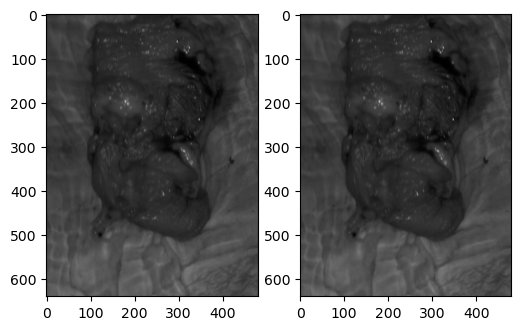

Median filter. Window: 7


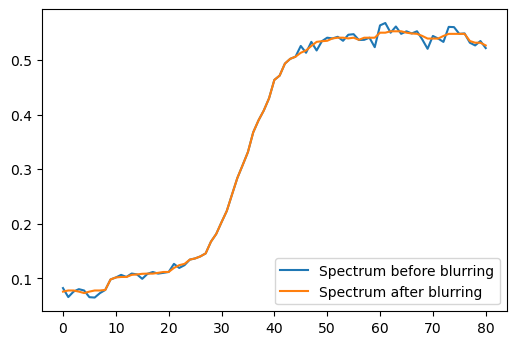

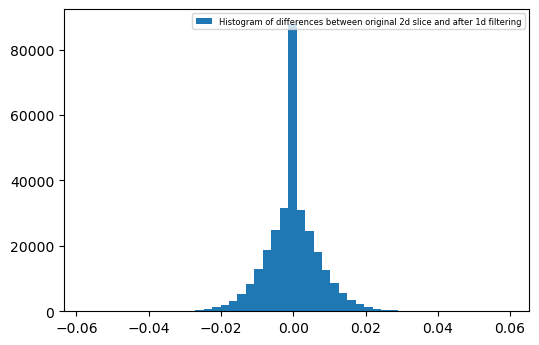

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


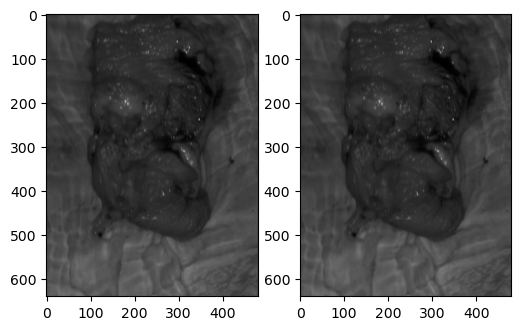

Median filter. Window: 8


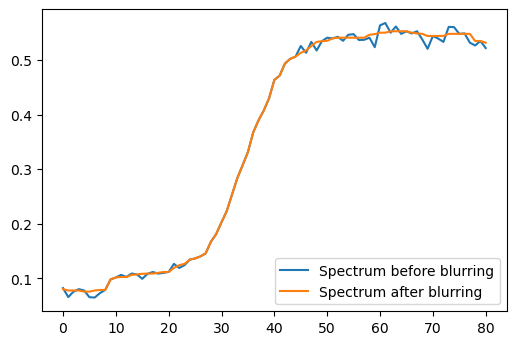

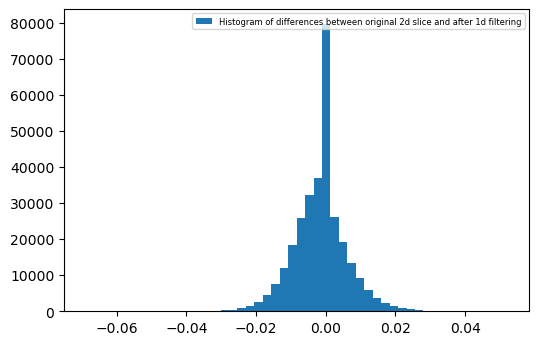

2d slice on feature 49 before 1d blure (left image) and after blur (right image)


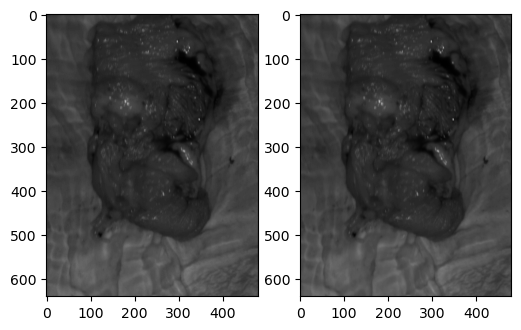

In [61]:
# try 1d gaussian and median filters with different sigmas and window sizes + check how changes 2d image after smoothing by 1d

# Conclusions GAUSSIAN: sigmas after 1 are too smooth (maximal 1.5), but will see. Sigma 0.1 doesn't affect anything
# Spectrum becomes smoother, but images not (what is expected)
# Beautiful observation: if substract original image from the image after gaussian1d and plot histogram of changes:
# we will see gaussian

# Conclusions MEDIAN:  windows 2-7 are okay 
# and we see the same situation as in gaussian filter that 2d images are not becoming blurry from 1d blurring 

spectrum_1d = np.reshape(spectrum, (spectrum.shape[0] * spectrum.shape[1], spectrum.shape[2]))
print('spectrum_1d.shape', spectrum_1d.shape)

def test_1d_filters(method, values):
    """Shows changes in spectrum and changes in 2d feature slice for gaussian and median filter for the given filter values

        Parameters
        ----------
        method : str
            "gaussian" or "median"
        values: list
            list of sigmas for gaussian filter and window sizes for median filters

        Raises
        ------
        ValueError
            If method is specified incorrect (not "gaussian" or "median")
    """

    for value in values:
        if method == 'gaussian':
            print(f'Gaussian filter. Sigma: {value}')
            spectrum_1d_smoothed = gaussian_filter1d(spectrum_1d, sigma=value)
        elif method == 'median':
            print(f'Median filter. Window: {value}')
            spectrum_1d_smoothed = median_filter(spectrum_1d, size=(1, value))
        else:
            raise ValueError('Error! method is specified wrong! Possible values: "gaussian" and "median"')
            
        spectrum_1d_smoothed_image = np.reshape(spectrum_1d_smoothed, spectrum.shape)

        plt.figure(dpi=100)
        plt.plot(spectrum_1d[49], label='Spectrum before blurring')
        plt.plot(spectrum_1d_smoothed[49], label='Spectrum after blurring')
        plt.legend(loc='lower right', fontsize=10)
        plt.show()
        
        plt.figure(dpi=100)
        plt.hist(spectrum[..., 60].flatten() - spectrum_1d_smoothed_image[..., 60].flatten(), bins=50, label='Histogram of differences between original 2d slice and after 1d filtering')
        plt.legend(loc='upper right', fontsize=6)
        plt.show()
        
        print('2d slice on feature 49 before 1d smoothing (left image) and after (right image)')
        fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100)
        ax1.imshow(spectrum[..., 60], cmap='gray')
        ax2.imshow(spectrum_1d_smoothed_image[..., 60])
        plt.show()
        
test_1d_filters('gaussian', [0.1, 0.5, 1, 1.5, 2, 2.5, 10])
print('--------------------------------------------------------------------------------------------------------------------------------')
test_1d_filters('median', [2, 3, 5, 6, 7, 8])

Gaussian filter. Sigma: 0.1
2d slice from feature: 60 before smoothing (left) and after (right)


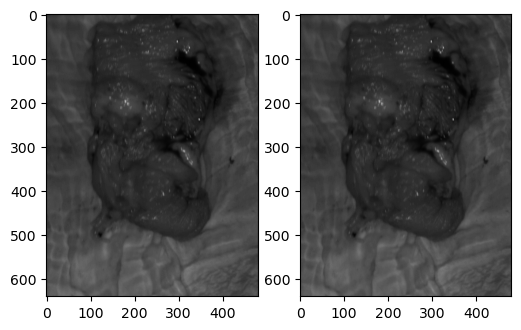

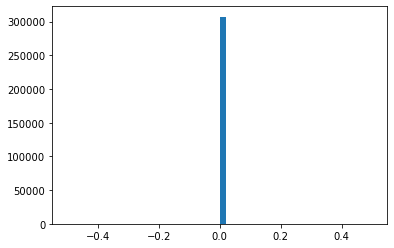

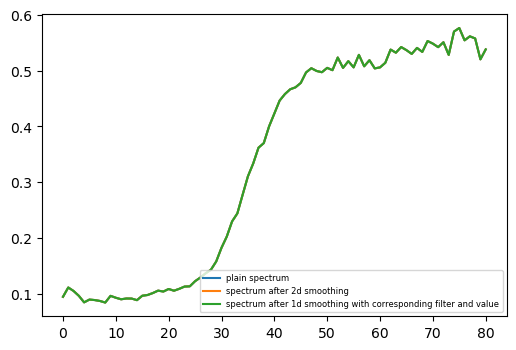

Gaussian filter. Sigma: 0.5
2d slice from feature: 60 before smoothing (left) and after (right)


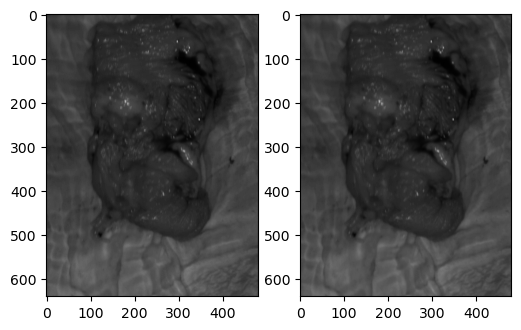

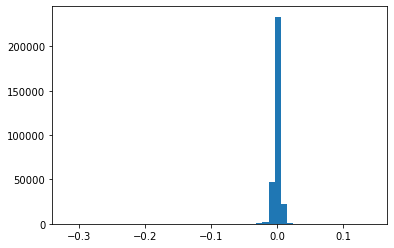

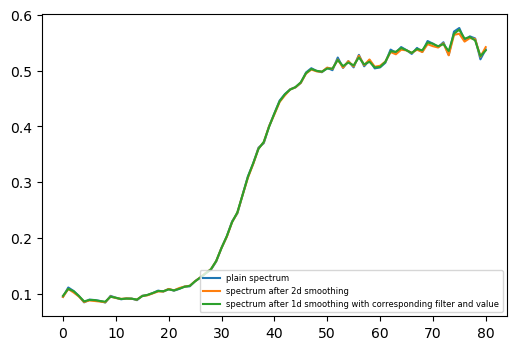

Gaussian filter. Sigma: 1
2d slice from feature: 60 before smoothing (left) and after (right)


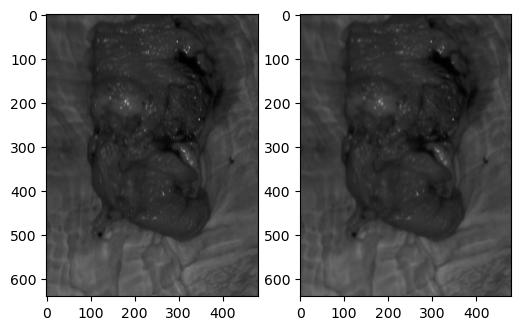

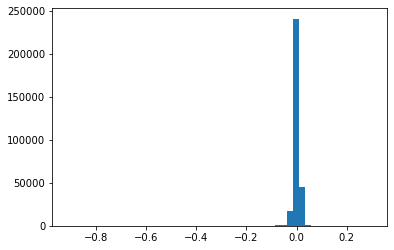

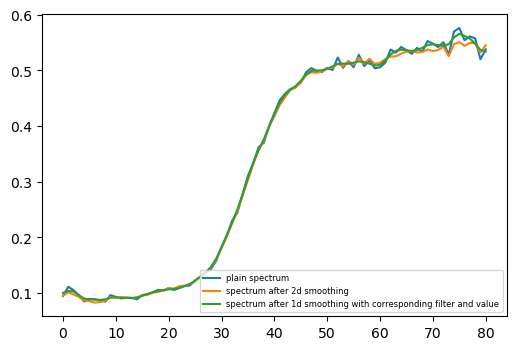

Gaussian filter. Sigma: 1.5
2d slice from feature: 60 before smoothing (left) and after (right)


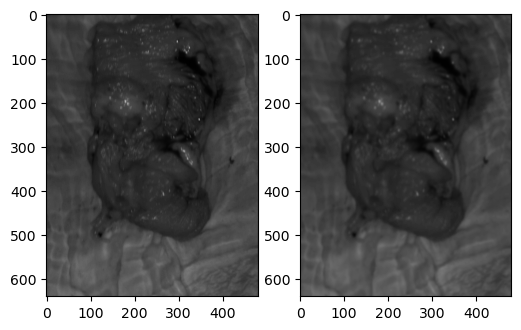

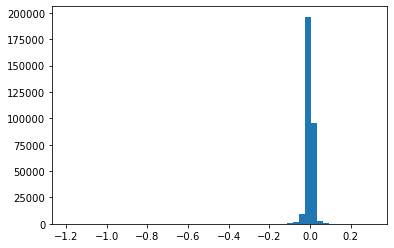

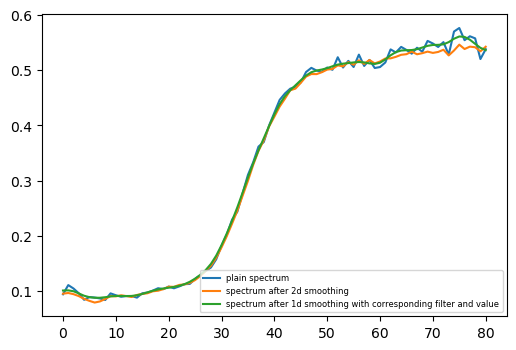

Gaussian filter. Sigma: 2
2d slice from feature: 60 before smoothing (left) and after (right)


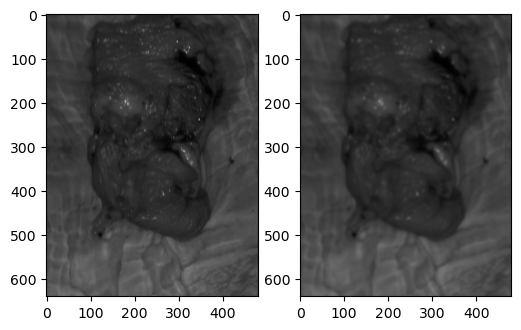

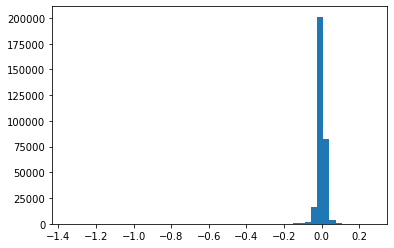

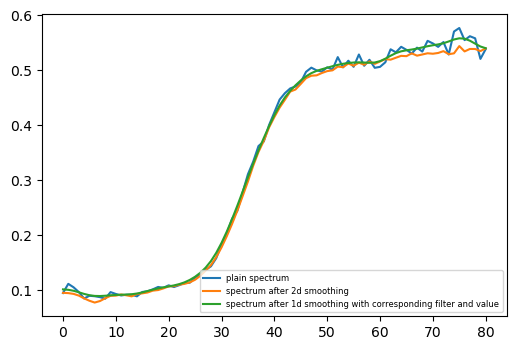

Gaussian filter. Sigma: 3
2d slice from feature: 60 before smoothing (left) and after (right)


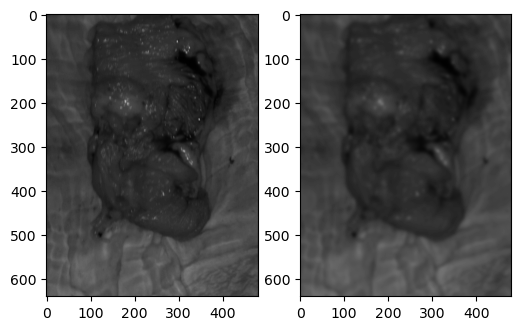

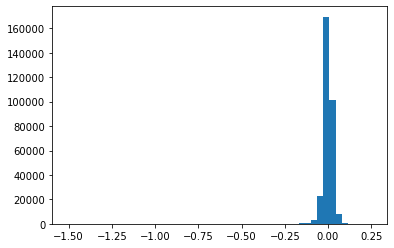

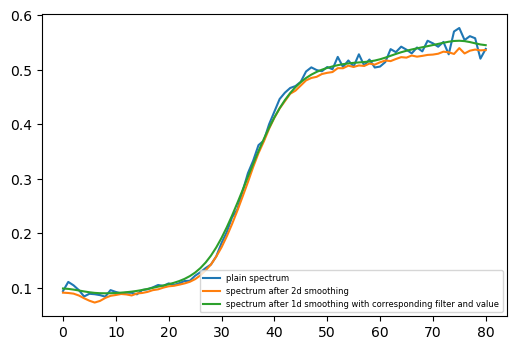

Gaussian filter. Sigma: 5
2d slice from feature: 60 before smoothing (left) and after (right)


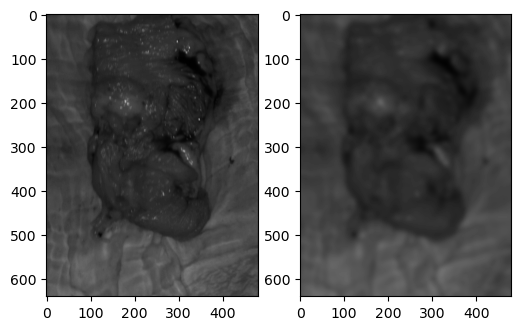

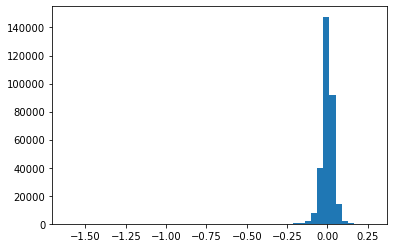

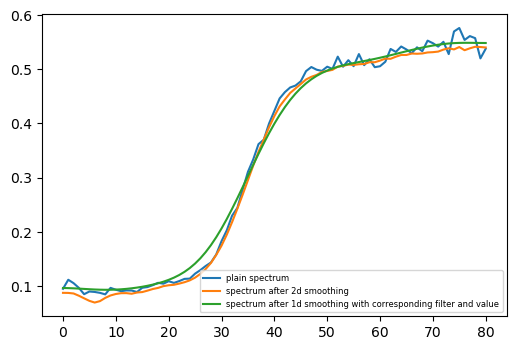

-----------------------------------------------------------------------------------------------------------------------------
Median filter. Window: 3
2d slice from feature: 60 before smoothing (left) and after (right)


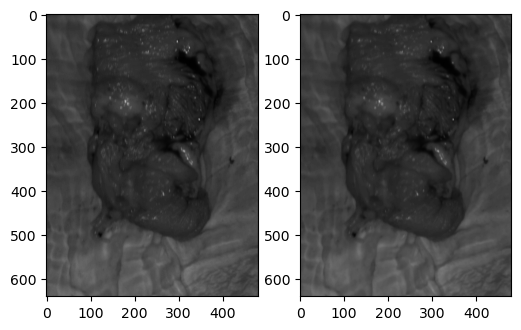

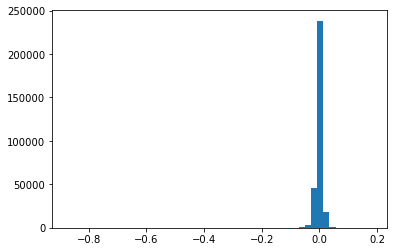

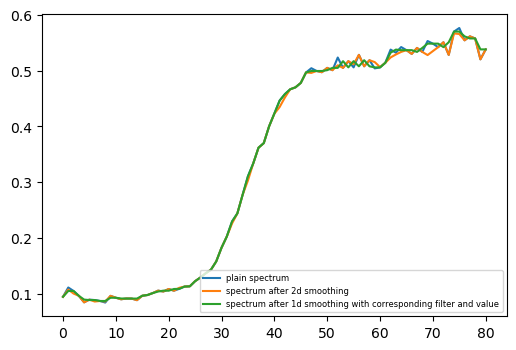

Median filter. Window: 5
2d slice from feature: 60 before smoothing (left) and after (right)


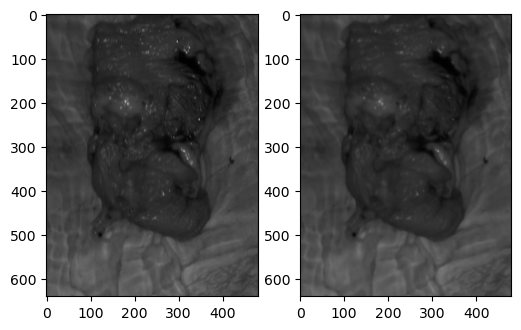

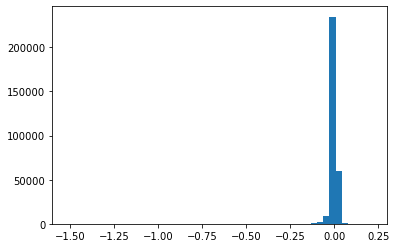

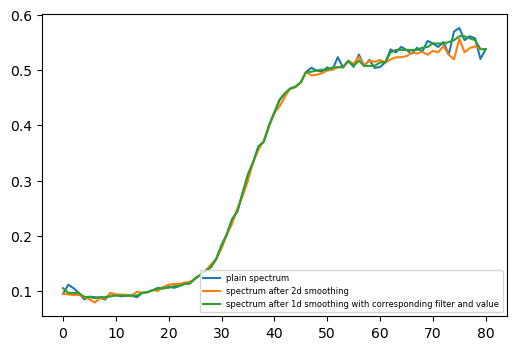

Median filter. Window: 6
2d slice from feature: 60 before smoothing (left) and after (right)


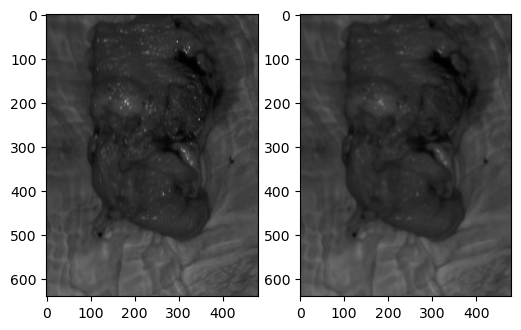

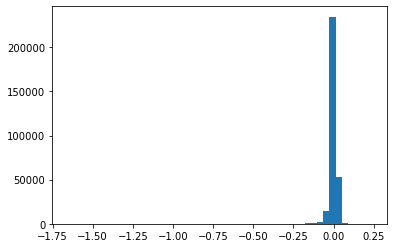

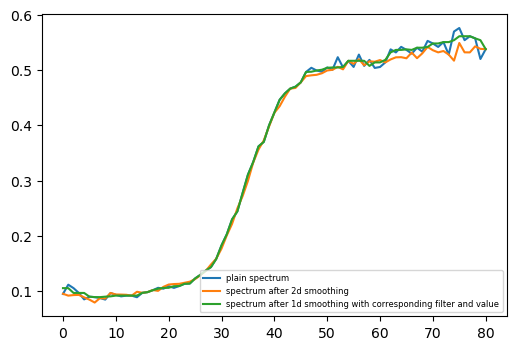

Median filter. Window: 8
2d slice from feature: 60 before smoothing (left) and after (right)


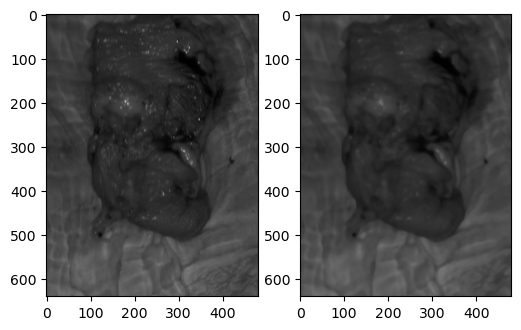

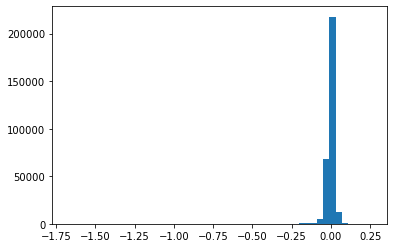

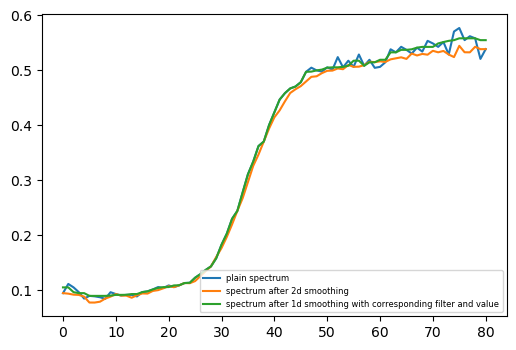

Median filter. Window: 10
2d slice from feature: 60 before smoothing (left) and after (right)


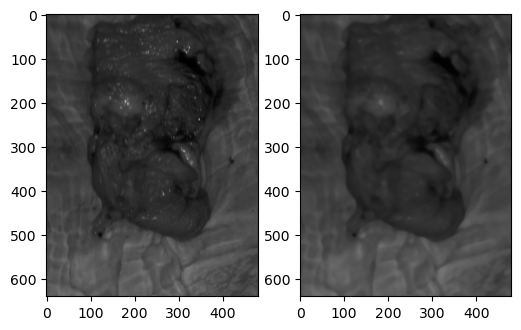

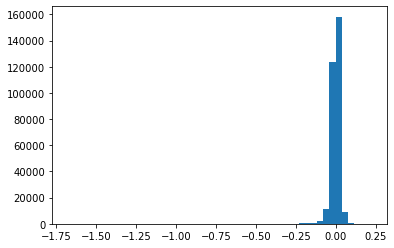

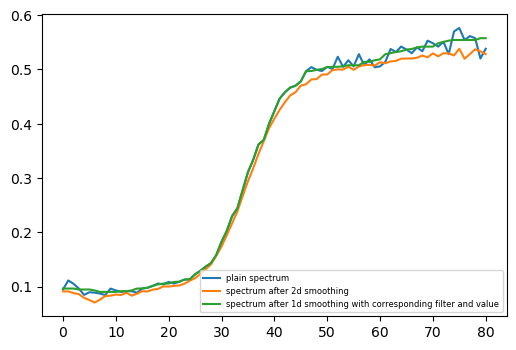

In [143]:
# try 2d gaussian and median filters with different sigmas and window sizes + check how changes 1d spectrum after 2d smoothing of the feature slice

# Conclusions GAUSSIAN: sigmas 1-2 affect moderate smoothing, 2-3 more extreme but still okay  
# This sigmas are higher than sigmas for 1d case, it means that when we will try 3d smoothing 
# probably we have to give different sigmas for different axis (higher for x and y, and lower for spectrum)

# Conclusions MEDIAN: window sizes 3-7 affect normal smoothing, 
# they are pretty same with 1d results, so we can try the same ones for all axis

# Conclusions "if 2d smoothing affected 1d"
# As we can see on the plots 2d smoothing affects also spectrum smoothing, althouph directly we haven't applied smoothing on spectrum 
# But, as expected, this smoothing is less smooth as direct smoothing
# But, it gives us but this may give us the idea that maybe 2d will be enough, or at least we can test it
# what works better - 2d or 3d

from matplotlib.pyplot import figure

spectrum_1d = np.reshape(spectrum, (spectrum.shape[0] * spectrum.shape[1], spectrum.shape[2]))

def test_2d_filters(method, values, show_features=[]):
    """Shows changes in 2d slices (how blurry they are) and changes in 1d spectrums for gaussian and median filter for the given filter values

        Parameters
        ----------
        method : str
            "gaussian" or "median"
        values: list of floats or ints
            list of sigmas for gaussian filter and window sizes for median filters
        show_features: list of ints, optional
            list of feature indexes to be shown to check blurring effect

        Raises
        ------
        ValueError
            If method is specified incorrect (not "gaussian" or "median")
    """

    for value in values:
        if method == 'gaussian':
            print(f'Gaussian filter. Sigma: {value}')
        elif method == 'median':
            print(f'Median filter. Window: {value}')
        else:
            raise ValueError('Error! method is specified wrong! Possible values: "gaussian" and "median"')
    
    
        spectrum_result = np.zeros(spectrum.shape)
        for feature in range(spectrum.shape[-1]):
            spectrum_feature = spectrum[..., feature]
            
            if method == 'gaussian':
                spectrum_2d_smoothed = gaussian_filter(spectrum_feature, sigma=value)
            elif method == 'median':
                spectrum_2d_smoothed = median_filter(spectrum_feature, size=value)

            #normalization and histograms
            #spectrum_feature = (spectrum_feature - np.min(spectrum_feature)) / (np.max(spectrum_feature) - np.min(spectrum_feature))
            #spectrum_feature = (spectrum_feature * 255).astype(int)
            #n1, bins1, patches1 = plt.hist(spectrum_feature.flatten(), bins=50)

            spectrum_result[..., feature] = spectrum_2d_smoothed.copy()
            
            #normalization of smoothed spectrum
            #spectrum_2d_smoothed = (spectrum_2d_smoothed - np.min(spectrum_2d_smoothed)) / (np.max(spectrum_2d_smoothed) - np.min(spectrum_2d_smoothed))
            #print(spectrum_2d_smoothed.shape)
            #print(np.max(spectrum_2d_smoothed), np.min(spectrum_2d_smoothed))
            
            if feature in show_features:
                print(f'2d slice from feature: {feature} before smoothing (left) and after (right)')
                fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100)
                ax1.imshow(spectrum_feature, cmap='gray', vmin=np.min(spectrum_feature), vmax=np.max(spectrum_feature))
                ax2.imshow(spectrum_2d_smoothed, cmap='gray', vmin=np.min(spectrum_feature), vmax=np.max(spectrum_feature))
                plt.show()
                
                plt.hist(spectrum_2d_smoothed.flatten() - spectrum_feature.flatten(), bins=50)
                plt.show()
                
        
        if method == 'gaussian':
            spectrum_1d_smoothed = gaussian_filter1d(spectrum_1d, sigma=value)
        elif method == 'median':
            spectrum_1d_smoothed = median_filter(spectrum_1d, size=(1, value))
            
        plt.figure(dpi=100)
        plt.plot(spectrum[0, 0], label='plain spectrum')
        plt.plot(spectrum_result[0, 0], label='spectrum after 2d smoothing')
        plt.plot(spectrum_1d_smoothed[0], label='spectrum after 1d smoothing with corresponding filter and value')
        plt.legend(loc='lower right', fontsize=6)
        plt.show()

test_2d_filters("gaussian", [0.1, 0.5, 1, 1.5, 2, 3, 5], show_features=[60])
print('-----------------------------------------------------------------------------------------------------------------------------')
test_2d_filters("median", [3, 5, 6, 8, 10], show_features=[60])


In [22]:
#try 3d filters

feature = 50
spectrum_3d = median_filter(spectrum, (5, 5, 1))



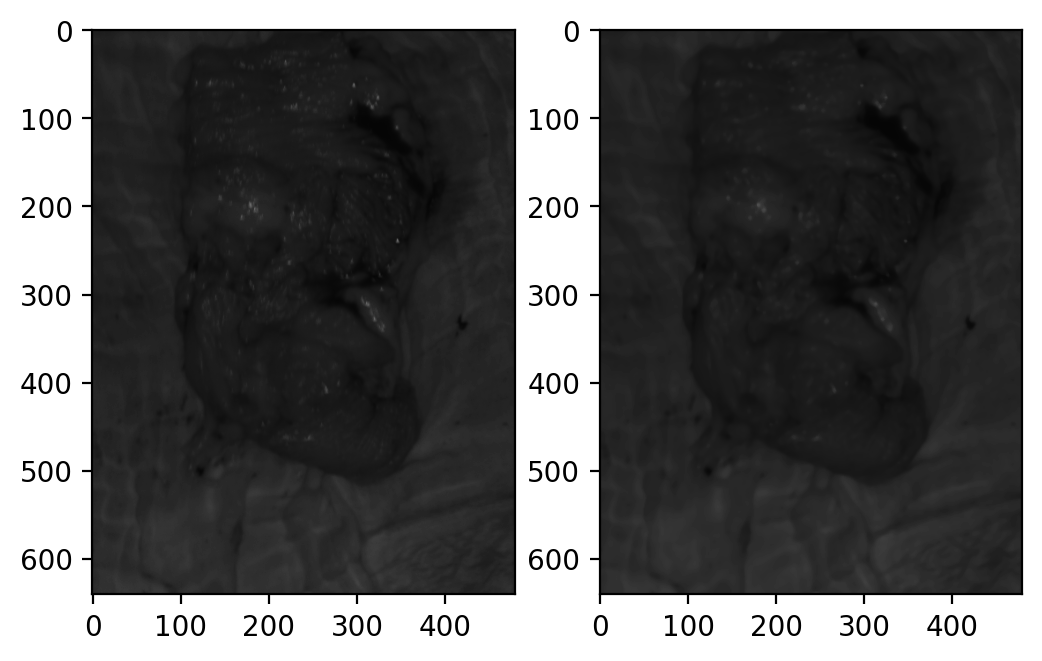

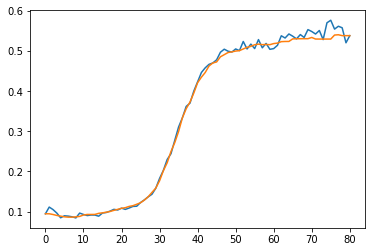

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
ax1.imshow(spectrum[..., feature], cmap='gray', vmin=np.min(spectrum), vmax=np.max(spectrum))
ax2.imshow(spectrum_3d[..., feature], cmap='gray', vmin=np.min(spectrum), vmax=np.max(spectrum))
plt.show()

plt.plot(spectrum[0, 0])
plt.plot(spectrum_3d[0, 0])
plt.show()

In [9]:
from sklearn.preprocessing import Normalizer, StandardScaler

def scale(spectrum, scaler, transpose=False):
    sp = np.reshape(spectrum, (spectrum.shape[0] * spectrum.shape[1], spectrum.shape[2]))
    #sp = Normalizer().fit_transform(sp)
    if transpose:
        sp = sp.T
    sp = scaler.fit_transform(sp)
    return np.reshape(sp, spectrum.shape)

In [12]:
# test if order of scaling and smoothing matters
# Prior hypotesis: matters


spectrum_min_max = scale(spectrum)#(spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))
spectrum_min_max_filtered = median_filter(spectrum_min_max, size=5)

spectrum_filtered = median_filter(spectrum_min_max, size=5)
spectrum_filtered_min_max =  scale(spectrum_filtered)#(spectrum_filtered - np.min(spectrum_filtered)) / (np.max(spectrum_filtered) - np.min(spectrum_filtered))


(24883200,) -0.22921896 0.66345215
-3.6790757 9.378317
-3.454786 8.714865


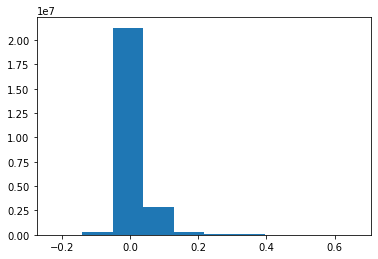

In [13]:
diff = spectrum_filtered_min_max.flatten() - spectrum_min_max_filtered.flatten()
print(diff.shape, np.min(diff), np.max(diff))
print(np.min(spectrum_filtered_min_max), np.max(spectrum_filtered_min_max))
print(np.min(spectrum_min_max_filtered), np.max(spectrum_min_max_filtered))

plt.hist(diff)
plt.show()

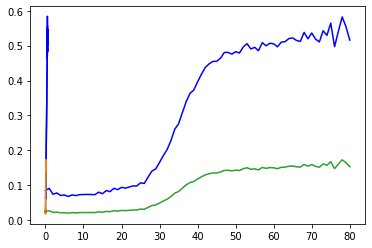

In [15]:
#test my understanding of how StandardScaler() takes  samples for scaling
#test svn and svn.T
#svn will standartize sample-wise
#svn.T feature-wise

spectrum_scaled = scale(spectrum, Normalizer())
plt.plot(*spectrum[:5, 0], c='b')
plt.plot(*spectrum_scaled[:5, 0])
plt.show()

(512, 512)


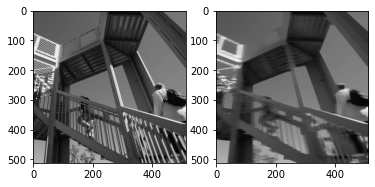

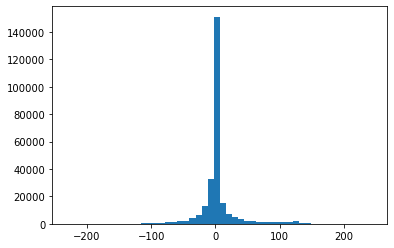

[-230 -202 -196 -193 -190 -189 -185 -184 -183 -179 -177 -175 -174 -172
 -169 -168 -166 -165 -163 -161 -160 -159 -158 -157 -156 -155 -153 -152
 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138
 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124
 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110
 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96
  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82
  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72  -71  -70  -69  -68
  -67  -66  -65  -64  -63  -62  -61  -60  -59  -58  -57  -56  -55  -54
  -53  -52  -51  -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  -40
  -39  -38  -37  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26
  -25  -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13  -12
  -11  -10   -9   -8   -7   -6   -5   -4   -3   -2   -1    0    1    2
    3    4    5    6    7    8    9   10   11   12   13   14   15   16
   17 

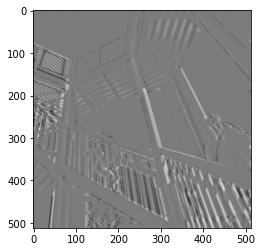

In [28]:
#experiments with some image

from scipy import misc
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()

#ascent = np.zeros((512, 512))
#ascent[:50, :50] = 0.5
#ascent[250:, 250:] = 1
print(ascent.shape)
result = median_filter(ascent, size=(1, 25))
#result_even = median_filter(ascent, size=27)

ax1.imshow(ascent, norm=NoNorm())
ax2.imshow(result, norm=NoNorm())
plt.show()

plt.hist(ascent.flatten()-result.flatten(), bins=50)
#plt.hist(ascent.flatten()-result_even.flatten(), bins=50)
#plt.hist(result.flatten(), bins=50)
plt.show()

#plt.hist(result.flatten()-result_even.flatten(), bins=50)
#plt.show()

plt.imshow(ascent-result)

print(np.unique(ascent.flatten()-result.flatten()))
print(np.max(ascent), np.min(ascent))

In [ ]:
# test median_filter for post processing (applying median filter for predictions)
# Part 1. Create raw 

In [ ]:
# test median_filter for post processing (applying median filter for predictions)
# Hypothesis: predictions look like salt and pfeffer noise and the median filter is very good in denoising of salt and pfeffer

import numpy as np

predictions = np.load('/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/test/ExperimentALLHowManyValidPatExclude/ExperimentALLHowManyValidPatExclude_WF_C1_/cp-0000/predictions_by_patient.npy')

In [13]:
# attempts to understand how works median filter with even window sizes

arr = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
arr_sm = median_filter(arr, size=1, cval=0, mode='constant', origin=0)
print(arr_sm)
print('Size 3')
arr_sm = median_filter(arr, size=3, cval=0, mode='constant', origin=0)
print(arr_sm)
print('Size 2')
arr_sm = median_filter(arr, size=2, cval=0, mode='constant', origin=0)
print(arr_sm)
arr_sm

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Size 3
[[0. 2. 0.]
 [2. 5. 3.]
 [0. 5. 0.]]
Size 2
[[0. 1. 2.]
 [1. 4. 5.]
 [4. 7. 8.]]


array([[0., 1., 2.],
       [1., 4., 5.],
       [4., 7., 8.]])

In [15]:
# attempts to understand how works median filter with even window sizes

arr = np.array([1., 2., 3., 4., 5.])
print(median_filter(arr, size=1, cval=0, mode='constant'))
print(median_filter(arr, size=2, cval=0, mode='constant'))
print(median_filter(arr, size=3, cval=0, mode='constant'))
print(median_filter(arr, size=4, cval=0, mode='constant'))
print(median_filter(arr, size=5, cval=0, mode='constant'))
print(median_filter(arr, size=6, cval=0, mode='constant'))

#in case of 1d even window size, window_size-1 is taken

[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 4.]
[1. 2. 3. 4. 4.]
[1. 2. 3. 3. 3.]
[1. 2. 3. 3. 3.]


In [12]:
# attempts to understand how works median filter with even window sizes


arr = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
arr_sm = median_filter(arr, size=(1, 2), cval=0, mode='constant')
arr_sm = median_filter(arr_sm, size=(2, 1), cval=0, mode='constant')
arr_sm

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [6]:
print(2 // 2)
print(9 // 2)

1
4


In [5]:
import numpy
numpy.where([[True, True, True], [True, True, True]], 1, 0).sum()

6

In [3]:
import numpy as np

arr = np.ones((3, 3)).astype(bool)
np.where(arr)

(array([0, 0, 0, 1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [8]:
arr = np.array([1, 2, 2, 3])
arr[arr == 2] = 100
print(arr)

arr = np.zeros((2, 2)) - 1
print(arr)

[  1 100 100   3]
[[-1. -1.]
 [-1. -1.]]


In [14]:
([6])

[6]